In [30]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import plotly.express as px
import plotly.graph_objects as go
import re

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

from prince import MCA

from scipy.stats import f_oneway

import statsmodels.api as sm

import statsmodels.formula.api as smf

import warnings

In [10]:
# Omitir FutureWarnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [3]:
df = pd.read_csv('../data/data_procesada.csv')

df.head()

,peso total,Oxalis,Quercus,Cyp.bulb,Phaseolus,Tephoria,Caracoles,Insectos,Physalis,Vitis.arizonica,...,gap_Colorado Plateau Pinyon-Juniper Woodland,gap_Madrean Encinal,gap_Madrean Juniper Savanna,gap_Madrean Pinyon-Juniper Woodland,gap_Mogollon Chaparral,gap_North American Warm Desert Bedrock Cliff and Outcrop,gap_North American Warm Desert Wash,gap_Rocky Mountain Gambel Oak-Mixed Montane Shrubland,gap_Rocky Mountain Ponderosa Pine Woodland,gap_Southern Rocky Mountain Pinyon-Juniper Woodland
0,3.4511,-0.151826,1.014576,-0.330587,0.069700,0.740843,-0.111776,-0.309342,-0.12498,-0.095665,...,False,False,False,False,False,False,False,False,False,False
1,5.1593,-0.151826,3.035506,-0.330587,-0.115927,0.584248,-0.111776,-0.305443,-0.12498,-0.095665,...,False,False,False,False,False,False,False,False,False,False
2,3.7792,-0.151826,4.010968,-0.330587,-0.207822,-0.246906,-0.111776,-0.309342,-0.12498,-0.095665,...,False,False,False,True,False,False,False,False,False,False
3,0.1466,-0.151826,-0.397361,-0.330587,-0.285565,-0.246906,-0.111776,-0.309342,-0.12498,-0.095665,...,False,False,False,False,False,False,False,False,False,False
4,0.6212,-0.151826,-0.397361,-0.330587,-0.311388,-0.246906,-0.111776,-0.309342,-0.12498,-0.095665,...,False,True,False,False,False,False,False,False,False,False


In [8]:
columns_pesos = df.columns[df.columns.get_loc("Oxalis"):df.columns.get_loc("Juniperus prob. deppeana") + 1]

<Axes: title={'center': 'Consumo de alimentos por Edad'}>

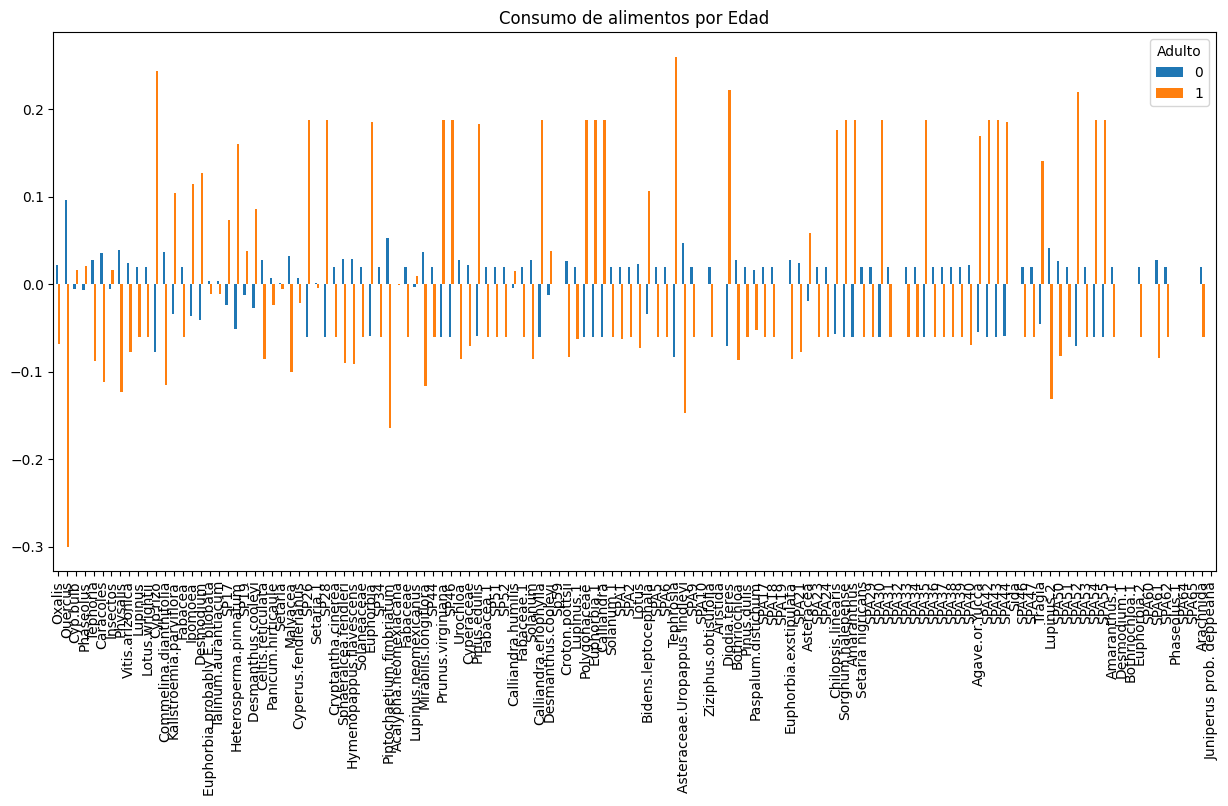

In [6]:
# Análisis descriptivo de variables numéricas
df.describe()

# Análisis de la dieta por edad
df.groupby('Adulto')[columns_pesos].mean().T.plot(kind='bar', figsize=(15, 7), title='Consumo de alimentos por Edad')

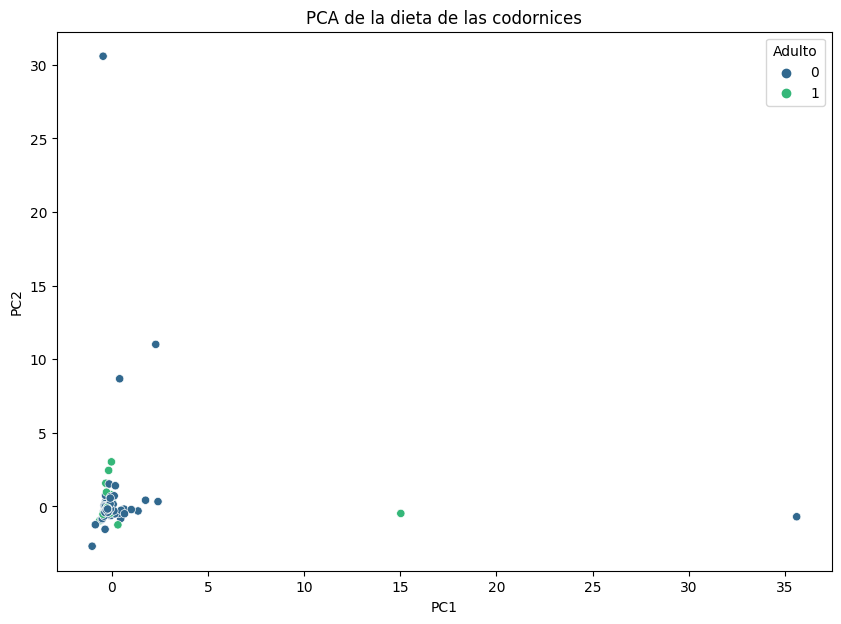

In [11]:
# Selección de datos para PCA (solo pesos de alimentos)
data_pca = df[columns_pesos]

# Aplicación de PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(data_pca)

# Creación de un DataFrame con las componentes principales
pca_df = pd.DataFrame(data=principalComponents, columns=['PC1', 'PC2'])
pca_df['Adulto'] = df['Adulto']

# Visualización de PCA
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 7))
sns.scatterplot(x='PC1', y='PC2', hue='Adulto', data=pca_df, palette='viridis')
plt.title('PCA de la dieta de las codornices')
plt.show()

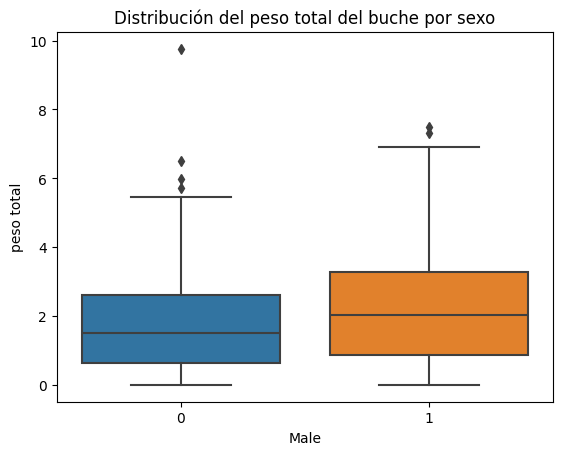

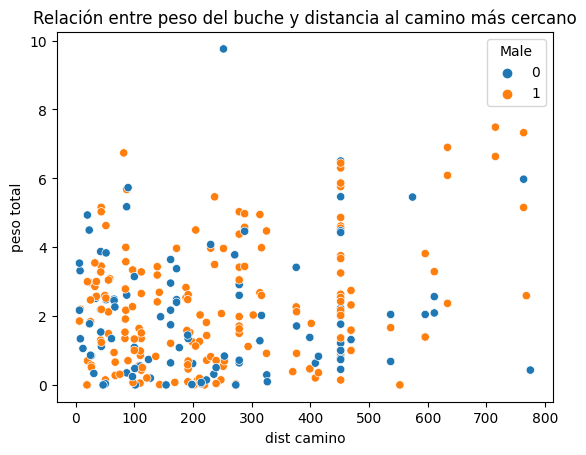

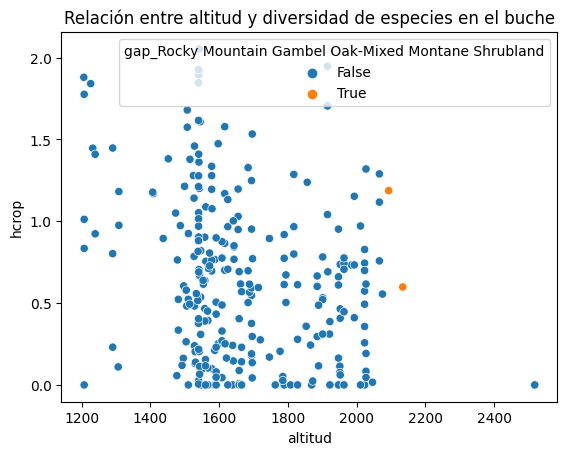

In [12]:
# Distribución del peso total del buche por sexo
sns.boxplot(x='Male', y='peso total', data=df)
plt.title('Distribución del peso total del buche por sexo')
plt.show()

# Relación entre peso del buche y distancia al camino más cercano
sns.scatterplot(x='dist camino', y='peso total', hue='Male', data=df)
plt.title('Relación entre peso del buche y distancia al camino más cercano')
plt.show()

# Relación entre altitud y diversidad de especies en el buche
sns.scatterplot(x='altitud', y='hcrop', hue='gap_Rocky Mountain Gambel Oak-Mixed Montane Shrubland', data=df)
plt.title('Relación entre altitud y diversidad de especies en el buche')
plt.show()

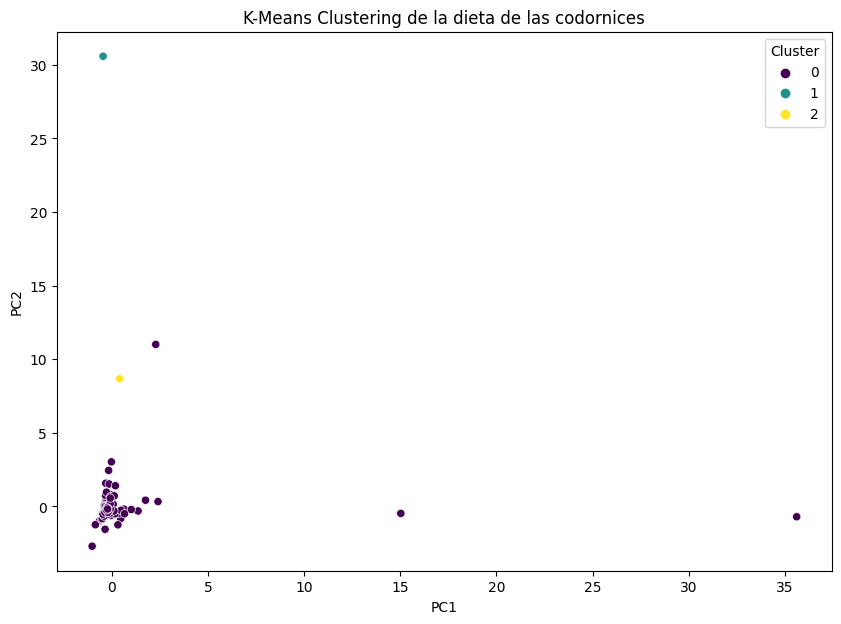

In [14]:
# Aplicación de K-Means
kmeans = KMeans(n_clusters=3)
clusters = kmeans.fit_predict(data_pca)

# Añadir clusters al DataFrame de PCA
pca_df['Cluster'] = clusters

# Visualización de Clústeres
plt.figure(figsize=(10, 7))
sns.scatterplot(x='PC1', y='PC2', hue='Cluster', data=pca_df, palette='viridis')
plt.title('K-Means Clustering de la dieta de las codornices')
plt.show()

In [17]:
# Selección de características y variable objetivo
X = df[columns_pesos]
y = df['Adulto']

# División de los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Modelo de Regresión Logística
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train, y_train)

# Predicciones
y_pred = logreg.predict(X_test)

# Evaluación del modelo
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.98      0.89        66
           1       0.67      0.12      0.20        17

    accuracy                           0.81        83
   macro avg       0.74      0.55      0.55        83
weighted avg       0.78      0.81      0.75        83



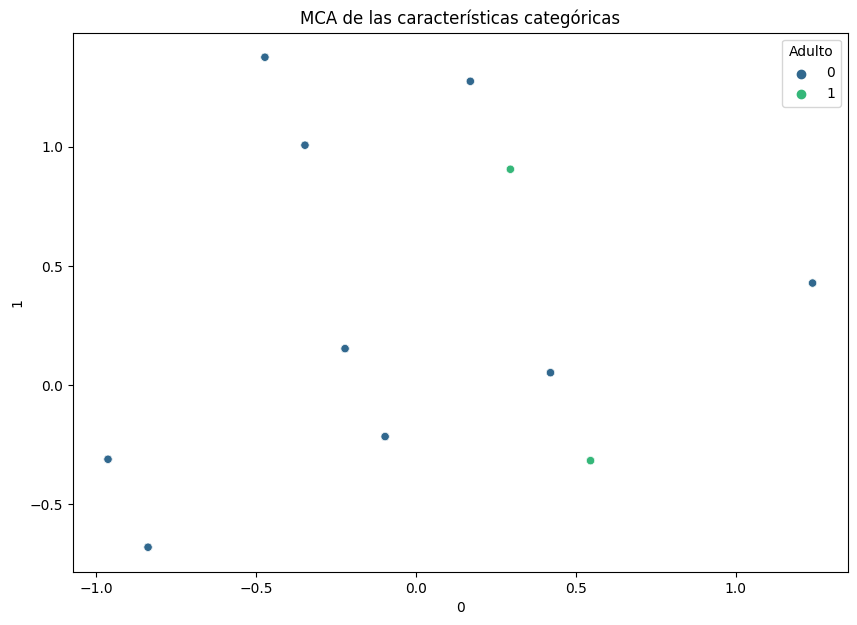

In [20]:
# Selección de características categóricas
categorical_columns = ['Male', 'estado_NM', 'gap_Rocky Mountain Gambel Oak-Mixed Montane Shrubland', 'gap_Madrean Encinal', 'gap_Apacherian-Chihuahuan Mesquite Upland Scrub']
mca = MCA(n_components=2)

# Aplicación de MCA
mca_results = mca.fit_transform(df[categorical_columns])

# Visualización de MCA
plt.figure(figsize=(10, 7))
sns.scatterplot(x=mca_results[0], y=mca_results[1], hue=df['Adulto'], palette='viridis')
plt.title('MCA de las características categóricas')
plt.show()

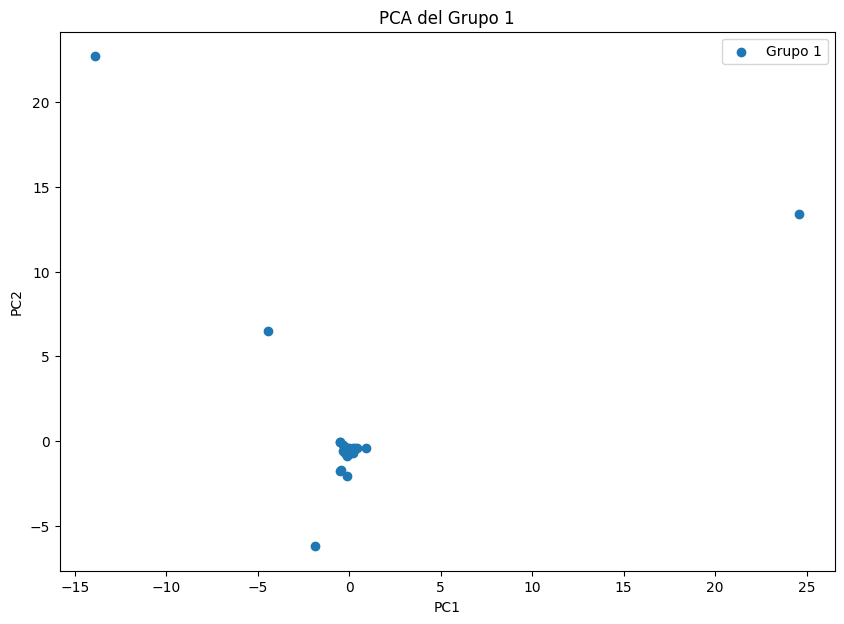

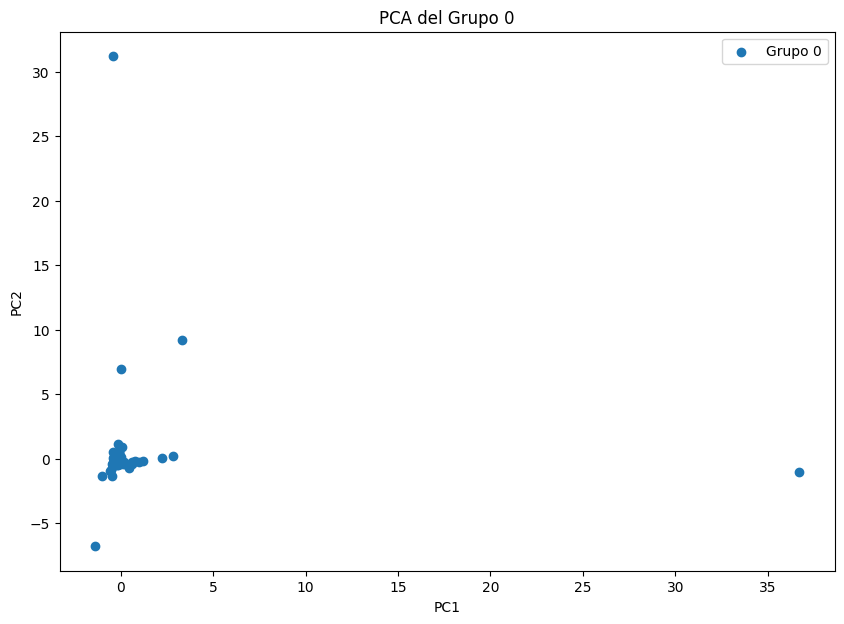

In [21]:
# PCA para cada grupo
groups = df['Adulto'].unique()
for group in groups:
    group_data = df[df['Adulto'] == group][columns_pesos]
    pca = PCA(n_components=2)
    pca_results = pca.fit_transform(group_data)
    
    plt.figure(figsize=(10, 7))
    plt.scatter(pca_results[:, 0], pca_results[:, 1], label=f'Grupo {group}')
    plt.title(f'PCA del Grupo {group}')
    plt.xlabel('PC1')
    plt.ylabel('PC2')
    plt.legend()
    plt.show()

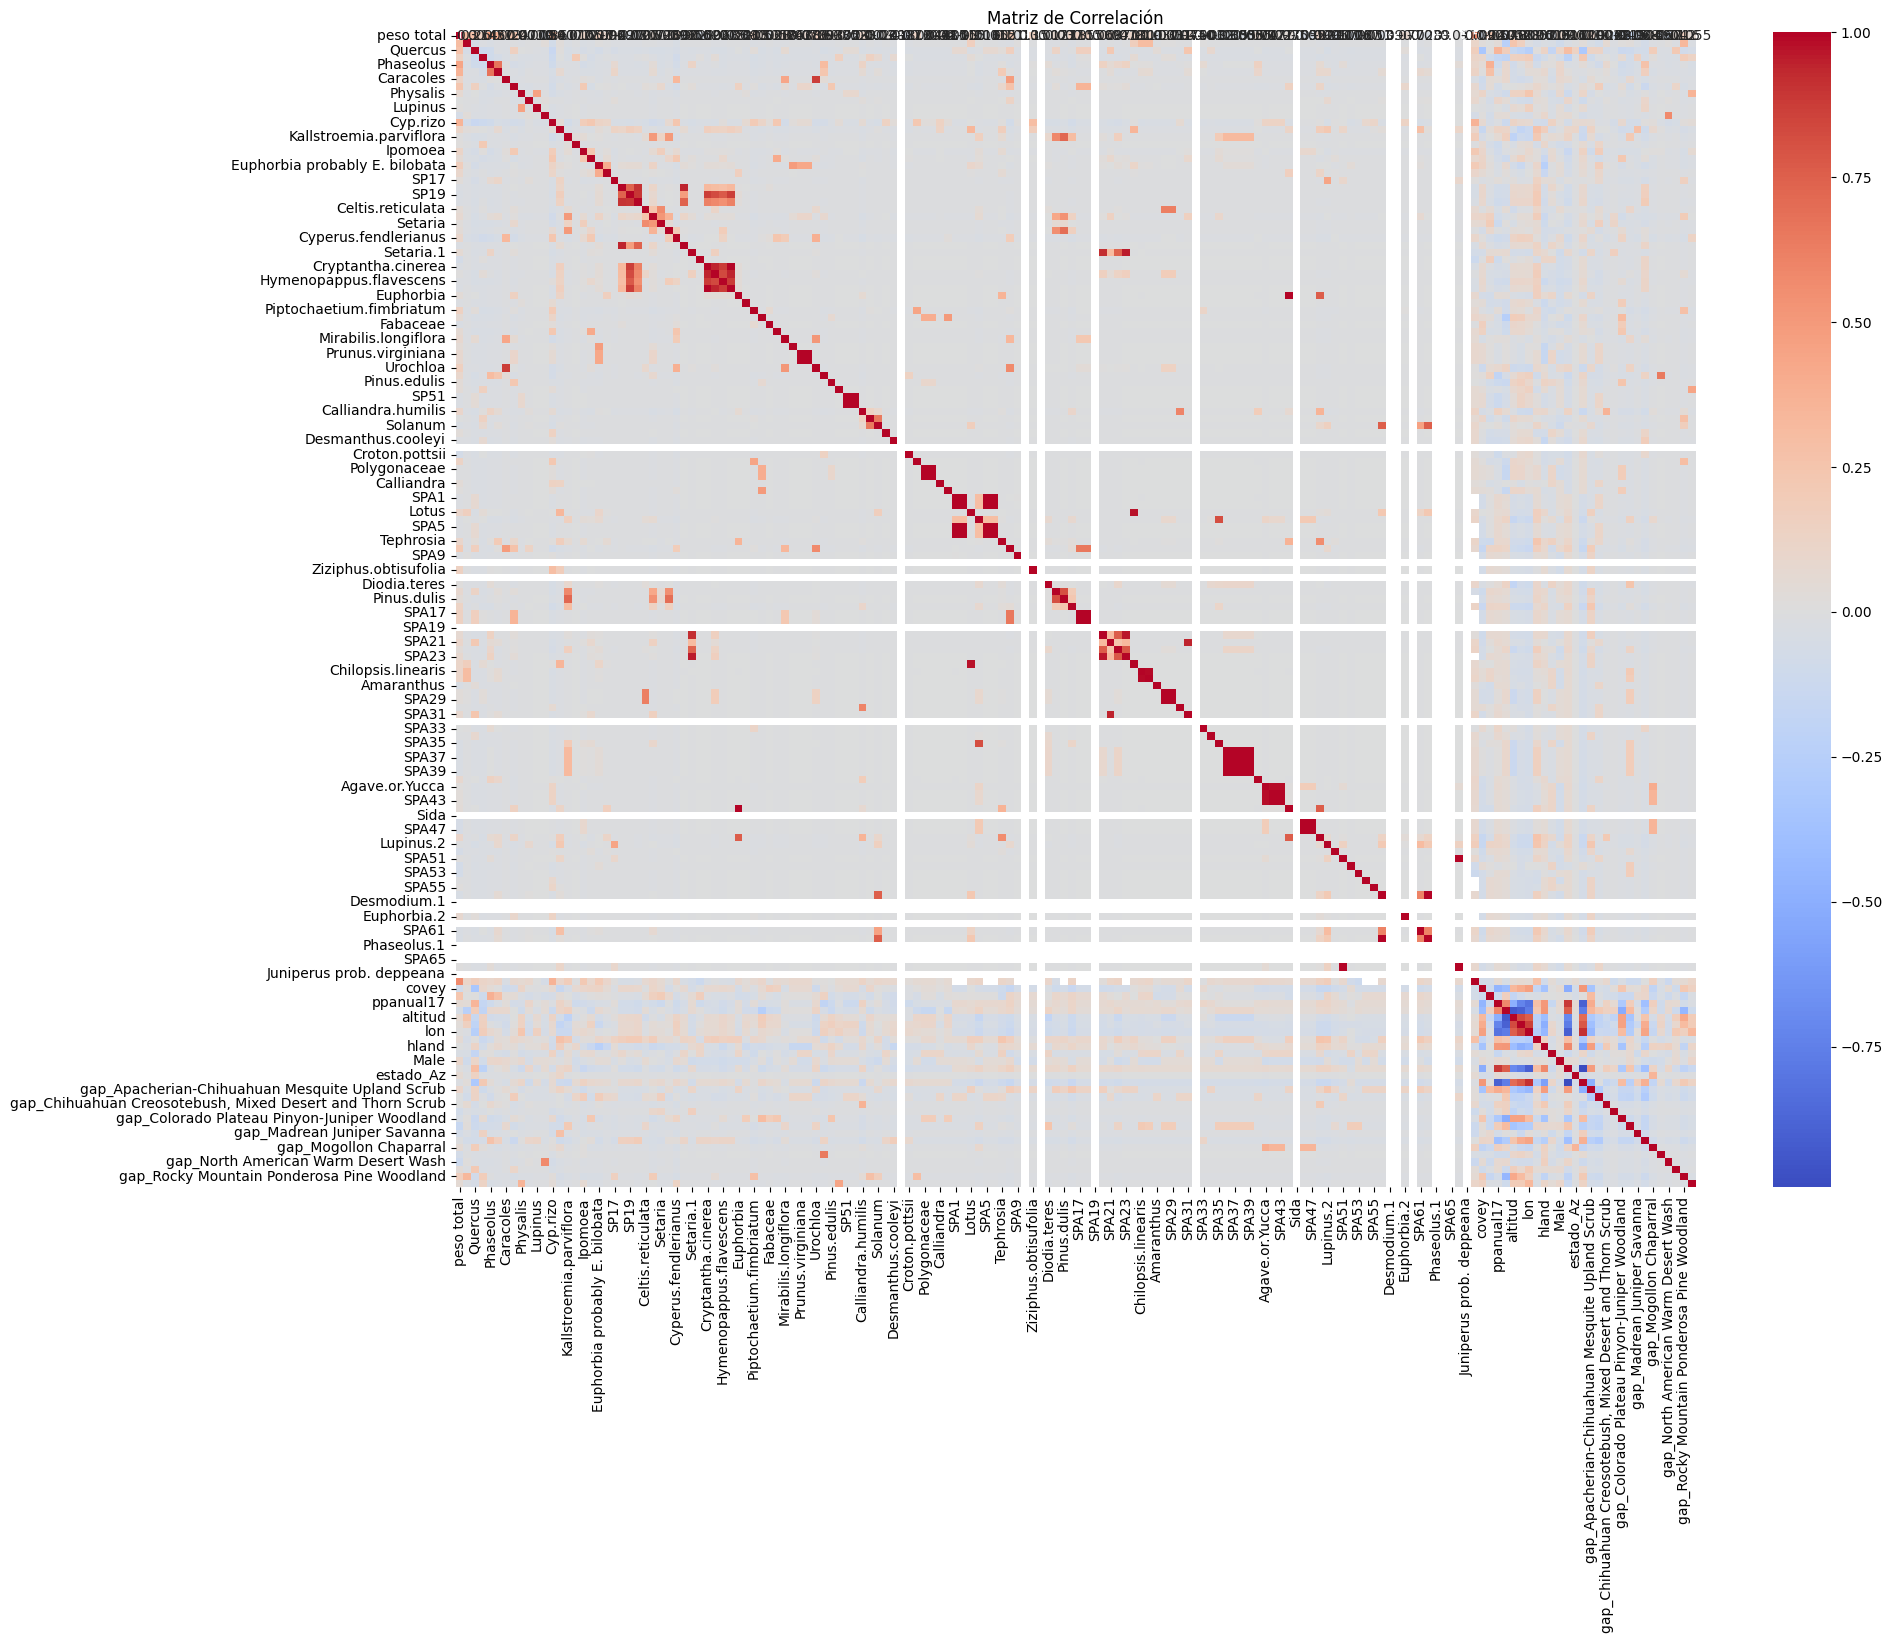

In [22]:
# Matriz de correlación
corr_matrix = df.corr()

# Mapa de calor de la matriz de correlación
plt.figure(figsize=(20, 15))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Matriz de Correlación')
plt.show()

In [24]:
# Selección de una característica de peso para el ANOVA
anova_results = f_oneway(df[df['Adulto'] == 0]['peso total'],
                         df[df['Adulto'] == 1]['peso total'])

print(f'F-statistic: {anova_results.statistic}, p-value: {anova_results.pvalue}')

F-statistic: 0.24349652341909847, p-value: 0.6220873456188523


In [26]:
# Selección de variables climáticas y peso total del buche
X = df[['ppanual17', 'tmedia17']]
y = df['peso total']

# Añadir constante al modelo (intercepto)
X = sm.add_constant(X)

# Ajustar el modelo de regresión
model = sm.OLS(y, X).fit()

# Resumen del modelo
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:             peso total   R-squared:                       0.013
Model:                            OLS   Adj. R-squared:                  0.006
Method:                 Least Squares   F-statistic:                     1.857
Date:                Mon, 27 May 2024   Prob (F-statistic):              0.158
Time:                        12:04:08   Log-Likelihood:                -548.66
No. Observations:                 276   AIC:                             1103.
Df Residuals:                     273   BIC:                             1114.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.4433      0.792      3.085      0.0

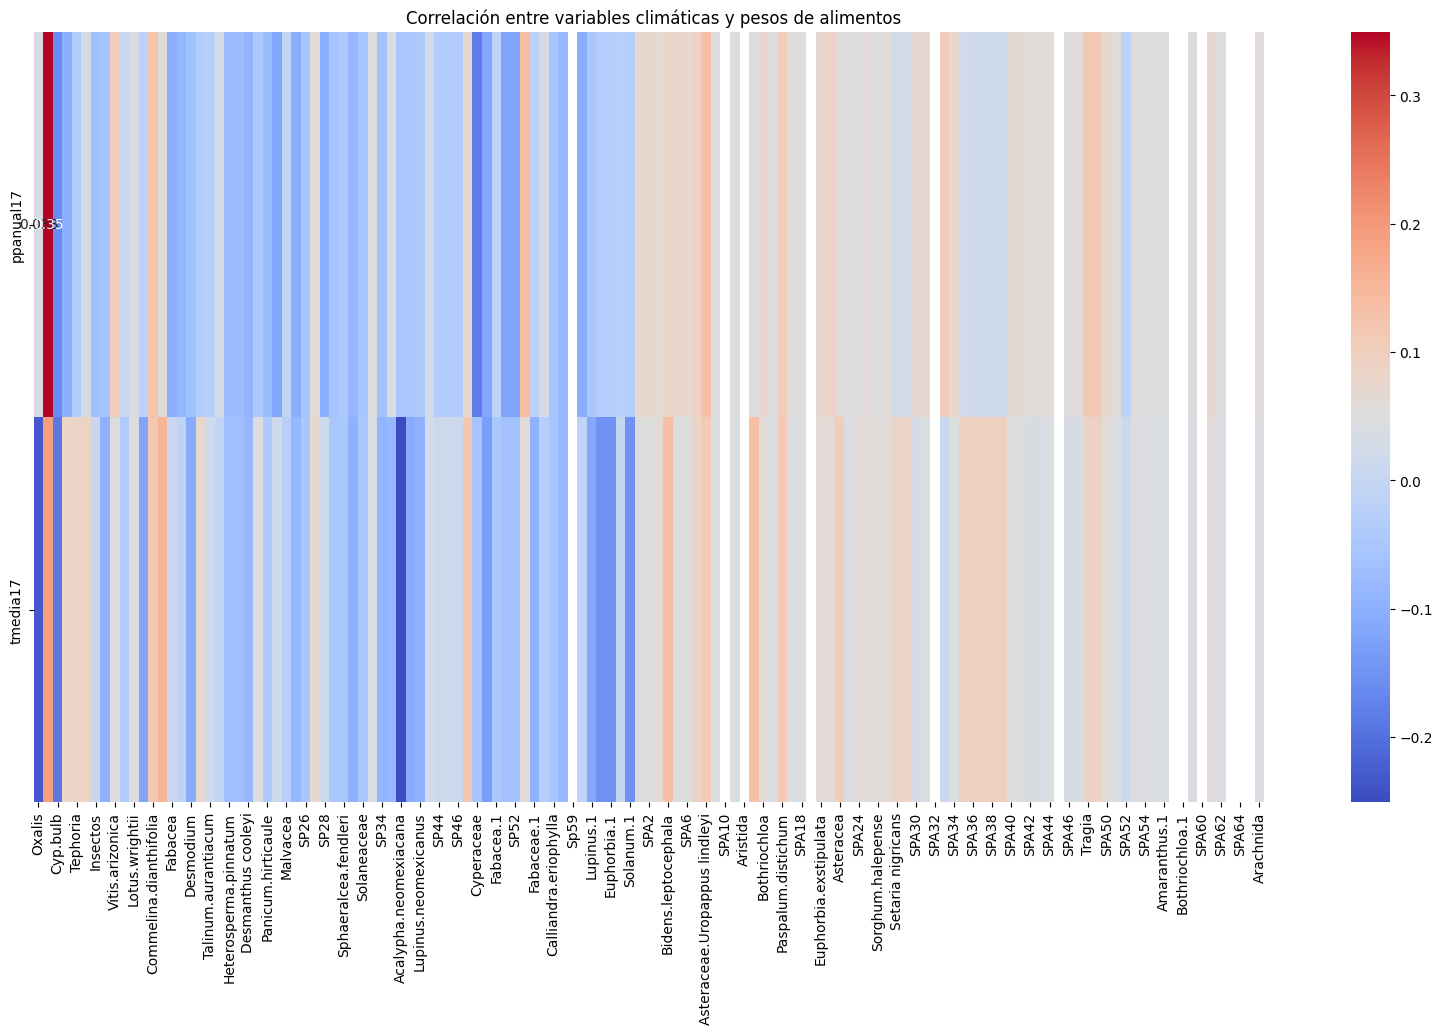

In [27]:
# Matriz de correlación entre variables climáticas y pesos de alimentos
climate_vars = ['ppanual17', 'tmedia17']
correlation_matrix = df[climate_vars + list(columns_pesos)].corr()

# Extraer y visualizar la submatriz de correlación relevante
correlation_submatrix = correlation_matrix.loc[climate_vars, columns_pesos]

plt.figure(figsize=(20, 10))
sns.heatmap(correlation_submatrix, annot=True, cmap='coolwarm')
plt.title('Correlación entre variables climáticas y pesos de alimentos')
plt.show()

In [29]:

# Ajustar un modelo lineal generalizado
glm_model = smf.glm(formula='Q("peso total") ~ ppanual17 + tmedia17', data=df, family=sm.families.Gaussian()).fit()

# Resumen del modelo
print(glm_model.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:        Q("peso total")   No. Observations:                  276
Model:                            GLM   Df Residuals:                      273
Model Family:                Gaussian   Df Model:                            2
Link Function:               Identity   Scale:                          3.1547
Method:                          IRLS   Log-Likelihood:                -548.66
Date:                Mon, 27 May 2024   Deviance:                       861.22
Time:                        12:06:59   Pearson chi2:                     861.
No. Iterations:                     3   Pseudo R-squ. (CS):            0.01343
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.4433      0.792      3.085      0.0

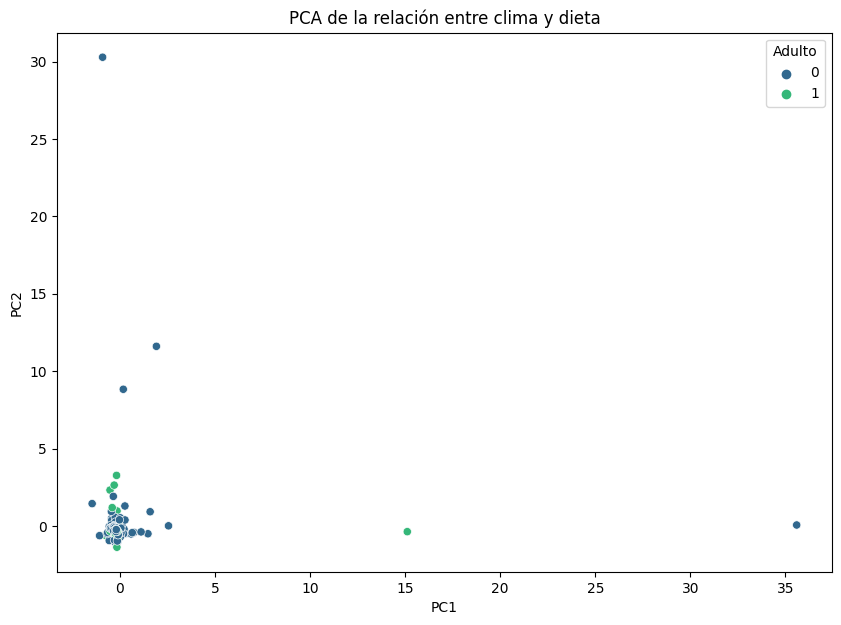

In [33]:
# Selección de datos para PCA (variables climáticas y pesos de alimentos)
climate_and_diet_data = df[climate_vars + list(columns_pesos)]

# Normalización de los datos
scaler = StandardScaler()
climate_and_diet_scaled = scaler.fit_transform(climate_and_diet_data)

# Aplicación de PCA
pca = PCA(n_components=2)
pca_results = pca.fit_transform(climate_and_diet_scaled)

# Creación de un DataFrame con las componentes principales
pca_df = pd.DataFrame(data=pca_results, columns=['PC1', 'PC2'])
pca_df['Adulto'] = df['Adulto']

# Visualización de PCA
plt.figure(figsize=(10, 7))
sns.scatterplot(x='PC1', y='PC2', hue='Adulto', data=pca_df, palette='viridis')
plt.title('PCA de la relación entre clima y dieta')
plt.show()